# Loops vs. state probability

In this notebook, I will explore the effect of a single outgoing cycle from a state on the probability of that state being sampled. The claim is that $p(q_i)$ is independent from the probabilities of any outgoing arcs from $q_i$ even in the cyclic case. I will also measure $ct(q_i)$, the number of times $q_i$ shows up in a sample (which may be $> 1$).

In [55]:
from rayuela.base.symbol import Sym, ε
from rayuela.fsa.fsa import FSA
from rayuela.fsa.state import State
from rayuela.base.semiring import Real, String

from synthetic import sample_fsa
from matplotlib import pyplot as plt
from tqdm import tqdm

# Single self-loop

This example shows how changing the probability on a self-loop arc $q_2 \to q_2$ does not change the sampling probability $p(q_2)$. 
$w$ is the weight of that arc.

In [68]:
def self_loop(w):
    fsa = FSA(Real)
    fsa.add_arc(State(0), Sym(1), State(1), Real(0.4))
    fsa.add_arc(State(0), Sym(2), State(2), Real(0.6))
    fsa.add_arc(State(1), Sym(1), State(3), Real(1.0))
    fsa.add_arc(State(2), Sym(2), State(3), Real(1.0 - w))
    fsa.add_arc(State(2), Sym(2), State(2), Real(w))
    fsa.set_I(0)
    fsa.set_F(3)
    return fsa

self_loop(0.2)

WFSA(4 states, <class 'rayuela.base.semiring.Real'>)

In [69]:
X = [w / 100 for w in range(100)]
Y_ct = []
Y_p = []

for w in tqdm(X):
    # create the fsa
    fsa = self_loop(w)
    
    # sample 1000 paths and calculate p(q_2)
    _, samps, _, ct = sample_fsa(fsa, samples=1000)
    
    ct_q = ct[Sym(2)]
    p_q = len([x for x in samps if Sym(2) in x])
    Y_ct.append(ct_q / 1000)
    Y_p.append(p_q / 1000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.17it/s]


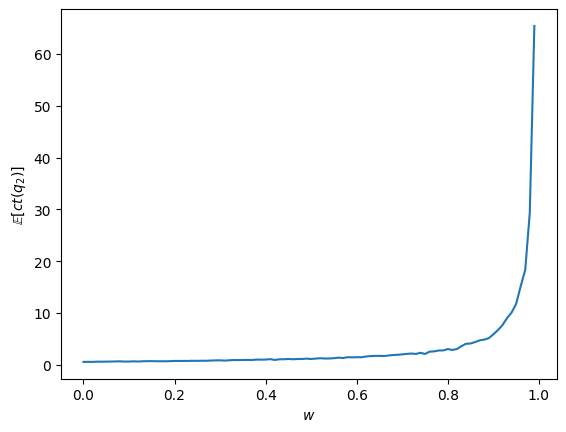

In [71]:
plt.xlabel('$w$')
plt.ylabel('$\mathbb{E}[ct(q_2)]$')
plt.plot(X, Y_ct)

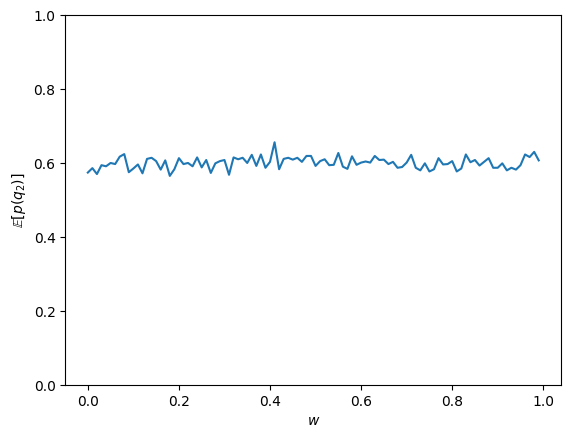

In [73]:
plt.xlabel('$w$')
plt.ylabel('$\mathbb{E}[p(q_2)]$')
plt.ylim(0, 1)
plt.plot(X, Y_p)

# Single loop to ancestor

$w$ is the weight of the arc from $q_2$ to $q_0$, which allows the cycle $0 \to 2 \to 0 \to 2 \to \ldots$

In [75]:
def ancestor_loop(w):
    fsa = FSA(Real)
    fsa.add_arc(State(0), Sym(1), State(1), Real(0.4))
    fsa.add_arc(State(0), Sym(2), State(2), Real(0.6))
    fsa.add_arc(State(1), Sym(1), State(3), Real(1.0))
    fsa.add_arc(State(2), Sym(2), State(3), Real(1.0 - w))
    fsa.add_arc(State(2), Sym(0), State(0), Real(w))
    fsa.set_I(0)
    fsa.set_F(3)
    return fsa

self_loop(0.2)

WFSA(4 states, <class 'rayuela.base.semiring.Real'>)

In [76]:
X = [w / 100 for w in range(100)]
Y_ct = []
Y_p = []

for w in tqdm(X):
    # create the fsa
    fsa = ancestor_loop(w)
    
    # sample 1000 paths and calculate p(q_2)
    _, samps, _, ct = sample_fsa(fsa, samples=1000)
    
    ct_q = ct[Sym(2)]
    p_q = len([x for x in samps if Sym(2) in x])
    Y_ct.append(ct_q / 1000)
    Y_p.append(p_q / 1000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.90it/s]


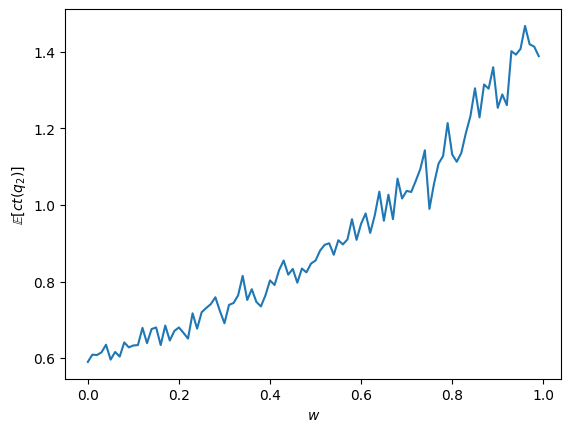

In [77]:
plt.xlabel('$w$')
plt.ylabel('$\mathbb{E}[ct(q_2)]$')
plt.plot(X, Y_ct)

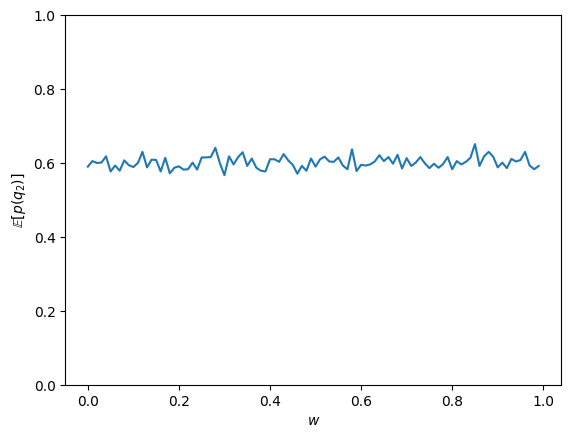

In [78]:
plt.xlabel('$w$')
plt.ylabel('$\mathbb{E}[p(q_2)]$')
plt.ylim(0, 1)
plt.plot(X, Y_p)